# Data Aggregation

Using Pandas

## Introduction to the Data ##

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
happiness2015 = pd.read_csv('World_Happiness_2015.csv')
first_5 = happiness2015.head()
info = happiness2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


## Using Loops to Aggregate Data ##

In [2]:
mean_happiness = {}
unique = happiness2015['Region'].unique()
for i in unique:
    region_group = happiness2015[happiness2015['Region'] == i]
    region_mean = region_group['Happiness Score'].mean()
    mean_happiness[i] = region_mean

## Creating GroupBy Objects ##

In [3]:
grouped = happiness2015.groupby('Region')

aus_nz = grouped.get_group('Australia and New Zealand')

## Exploring GroupBy Objects ##

In [4]:
grouped = happiness2015.groupby('Region')
north_america = happiness2015.iloc[[4,14]]
na_group = grouped.get_group('North America')

equal = na_group == north_america

## Common Aggregation Methods with Groupby ##

In [5]:
grouped = happiness2015.groupby('Region')
means = grouped.mean()

## Aggregating Specific Columns with Groupby ##

In [6]:
grouped = happiness2015.groupby('Region')
happy_grouped = grouped['Happiness Score']
happy_mean = happy_grouped.mean()

## The Agg() Method ##

In [7]:
import numpy as np
grouped = happiness2015.groupby('Region')
happy_grouped = grouped['Happiness Score']
def dif(group):
    return (group.max() - group.mean())

happy_mean_max = happy_grouped.agg([np.mean, np.max])
mean_max_dif = happy_grouped.agg(dif)

## Computing Multiple and Custom Aggregations with the Agg() Method ##

In [8]:
happiness_means = happiness2015.groupby('Region')['Happiness Score'].mean()
happiness_means = happiness2015.groupby('Region')['Happiness Score'].mean()
print(happiness_means)

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64


## Aggregation with Pivot Tables ##

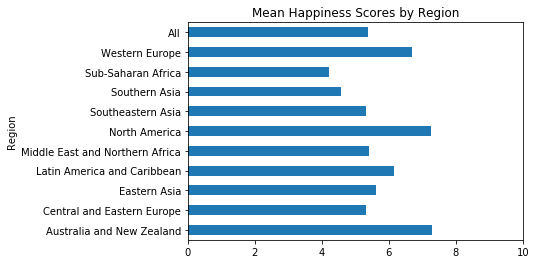

In [9]:
pv_happiness = happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean, margins=True)
pv_happiness.plot(kind = 'barh', xlim = (0,10), title = 'Mean Happiness Scores by Region', legend = False)
plt.show()
world_mean_happiness = happiness2015['Happiness Score'].mean()

## Aggregating Multiple Columns and Functions with Pivot Tables ##

In [10]:
grouped = happiness2015.groupby('Region')['Happiness Score', 'Family']
happy_family_stats = grouped.agg([np.min, np.max, np.mean])


pv_happy_family_stats = happiness2015.pivot_table(['Happiness Score', 'Family'], 'Region', aggfunc = [np.min, np.max, np.mean], margins = True)

In [11]:
pv_happy_family_stats

amin                     amax  \
                                  Family Happiness Score   Family   
Region                                                              
Australia and New Zealand        1.30923           7.284  1.31967   
Central and Eastern Europe       0.38562           4.218  1.34043   
Eastern Asia                     0.94675           4.874  1.30060   
Latin America and Caribbean      0.74302           4.518  1.30477   
Middle East and Northern Africa  0.47489           3.006  1.22393   
North America                    1.24711           7.119  1.32261   
Southeastern Asia                0.62736           3.819  1.26504   
Southern Asia                    0.30285           3.575  1.10395   
Sub-Saharan Africa               0.00000           2.839  1.18468   
Western Europe                   0.89318           4.857  1.40223   
All                              0.00000           2.839  1.40223   

                                                     mean                  
                                Happiness Score    Family Happiness Score  
Region                                                                     
Australia and New Zealand                 7.286  1.314450        7.285000  
Central and Eastern Europe                6.505  1.053042        5.332931  
Eastern Asia                              6.298  1.099427        5.626167  
Latin America and Caribbean               7.226  1.104720        6.144682  
Middle East and Northern Africa           7.278  0.920490        5.406900  
North America                             7.427  1.284860        7.273000  
Southeastern Asia                         6.798  0.940468        5.317444  
Southern Asia                             5.253  0.645321        4.580857  
Sub-Saharan Africa                        5.477  0.809085        4.202800  
Western Europe                            7.587  1.247302        6.689619  
All                                       7.587  0.991046        5.375734